#Preprocessing Dataset

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

##Dataset Load

In [4]:
# Membaca data dari CSV
file_path = os.getcwd() + '/rice_dataset_1993-2020.csv'
df = pd.read_csv(file_path)

periode musim tanam:
- Utama: Musim tanam utama (biasanya akhir tahun hingga awal tahun berikutnya, seperti Desember-Februari).
- Gadu: Musim tanam kedua (biasanya Maret-Juni).
- Kemarau: Musim tanam ketiga (biasanya Juli-November).

kategori hasil panen:
- GKP(gabah kering panen) = 100%
- GKG(gabah kering giling) = ±70% dari GKP
- Beras = ±65% dari GKG

In [5]:
df.head()

,Tahun,Musim Tanam,Luas Lahan (m2),Curah Hujan,Tingkat Penyakit,Suhu (C),Jarak Tanam,Jumlah Bibit (kg),GKP (kg),GKG (kg),Beras (kg)
0,1993,Musim Tanam Utama,15895,sangat tinggi,normal,31.70,20cm x 20cm,370.04,2844.31,1991.02,1294.16
1,1993,Musim Tanam Utama,22062,tinggi,tinggi,22.14,30cm x 30cm,219.41,2299.25,1609.47,1046.16
2,1993,Musim Tanam Utama,2533,normal,sangat tinggi,29.26,25cm x 25cm,40.73,86.93,60.85,39.55
3,1993,Musim Tanam Utama,25758,sangat tinggi,tinggi,34.61,30cm x 30cm,280.85,1008.39,705.87,458.82
4,1993,Musim Tanam Utama,1999,normal,sangat rendah,20.70,30cm x 30cm,22.78,1232.98,863.09,561.01


##Data Cleaning

1. tingkatan curah hujan
- sangat rendah = 0
- rendah = 1
- normal = 2
- tinggi = 3
- sangat tinggi = 4

2. tingkatan penyakit
- sangat rendah = 0
- rendah = 1
- normal = 2
- tinggi = 3
- sangat tinggi = 4

3. jumlah bibit float -> int
4. GKP, GKG, Beras float -> int

In [6]:
# Konversi Curah Hujan ke numerik
rainfall_map = {'sangat rendah': 0, 'rendah': 1, 'normal': 2, 'tinggi': 3, 'sangat tinggi': 4}
df['Curah_Hujan_Num'] = df['Curah Hujan'].map(rainfall_map)

# Konversi Tingkat Penyakit ke numerik
pest_map = {'sangat rendah': 0, 'rendah': 1, 'normal': 2, 'tinggi': 3, 'sangat tinggi': 4}
df['Tingkat_Penyakit_Num'] = df['Tingkat Penyakit'].map(pest_map)

# Konversi kategori Jarak Tanam ke numerik
spacing_map = {'20cm x 20cm': 0, '25cm x 25cm': 1, '30cm x 30cm': 2}
df['Jarak_Tanam_Num'] = df['Jarak Tanam'].map(spacing_map)

# Konversi Jumlah Bibit dan Prediksi Hasil Panen menjadi integer jika diperlukan
df['Jumlah_Bibit_kg'] = df['Jumlah Bibit (kg)'].astype(int)
df['GKP_kg'] = df['GKP (kg)'].astype(int)
df['GKG_kg'] = df['GKG (kg)'].astype(int)
df['Beras_kg'] = df['Beras (kg)'].astype(int)


##EDA

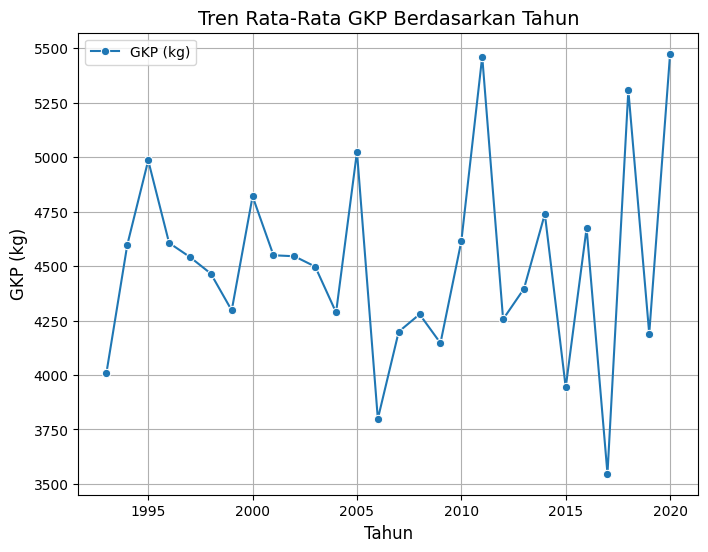

<ipython-input-7-6700a1d4b640>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


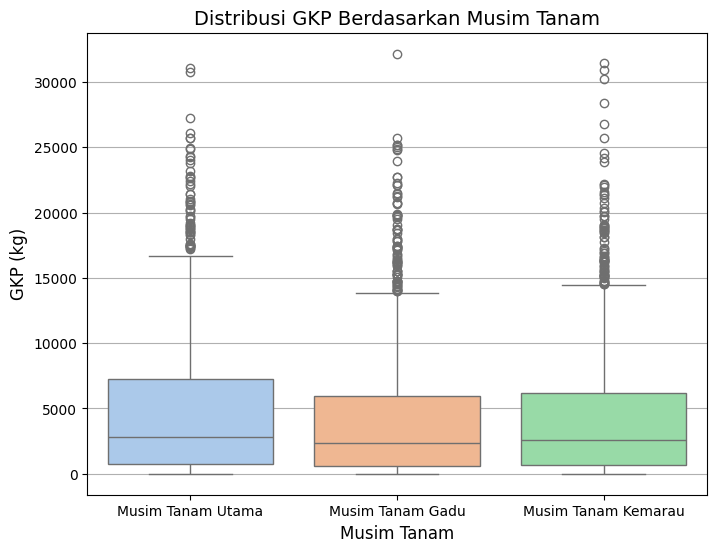

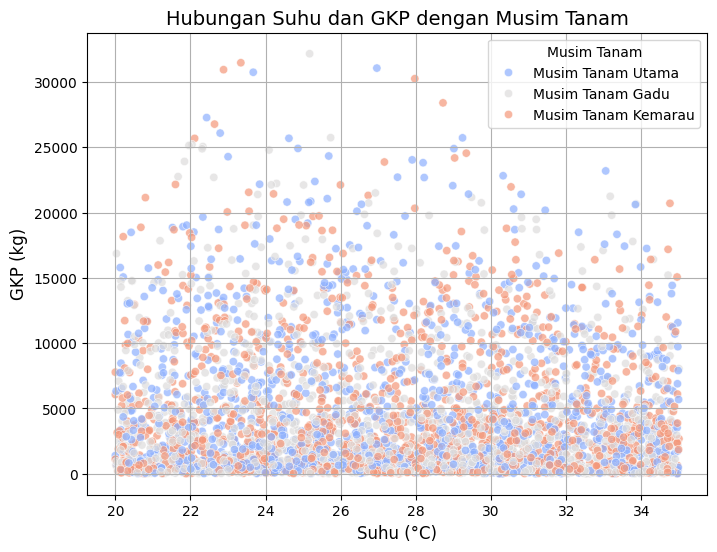

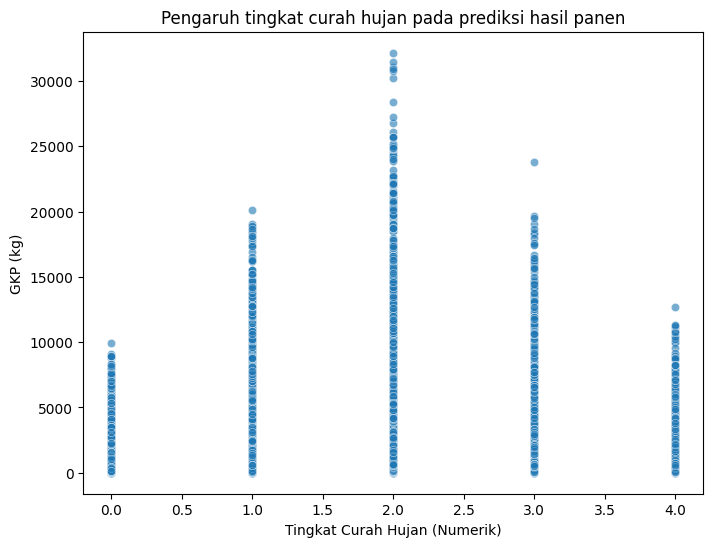

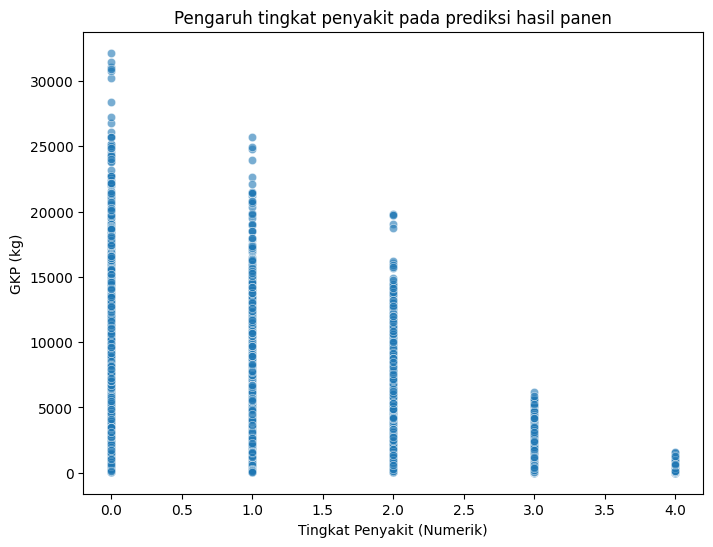

In [7]:
# 1. Plot Tren Rata-Rata GKP Berdasarkan Tahun
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df.groupby("Tahun")["GKP_kg"].mean().reset_index(),
    x="Tahun",
    y="GKP_kg",
    marker="o",
    label="GKP (kg)"
)
plt.title("Tren Rata-Rata GKP Berdasarkan Tahun", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("GKP (kg)", fontsize=12)
plt.grid()
plt.show()

# 2. Distribusi Hasil Panen Berdasarkan Musim Tanam
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Musim Tanam",
    y="GKP_kg",
    palette="pastel"
)
plt.title("Distribusi GKP Berdasarkan Musim Tanam", fontsize=14)
plt.xlabel("Musim Tanam", fontsize=12)
plt.ylabel("GKP (kg)", fontsize=12)
plt.grid(axis='y')
plt.show()

# 3. Scatter Plot Hubungan Suhu dan GKP
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Suhu (C)",
    y="GKP_kg",
    hue="Musim Tanam",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Hubungan Suhu dan GKP dengan Musim Tanam", fontsize=14)
plt.xlabel("Suhu (°C)", fontsize=12)
plt.ylabel("GKP (kg)", fontsize=12)
plt.legend(title="Musim Tanam")
plt.grid()
plt.show()

# 4. Curah hujan terhadap Hasil panen
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Curah_Hujan_Num'], y=df['GKP_kg'], alpha=0.6)
plt.title('Pengaruh tingkat curah hujan pada prediksi hasil panen')
plt.xlabel('Tingkat Curah Hujan (Numerik)')
plt.ylabel('GKP (kg)')
plt.show()

# 5. Tingkat Penyakit terhadap hasil panen
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Tingkat_Penyakit_Num'], y=df['GKP_kg'], alpha=0.6)
plt.title('Pengaruh tingkat penyakit pada prediksi hasil panen')
plt.xlabel('Tingkat Penyakit (Numerik)')
plt.ylabel('GKP (kg)')
plt.show()

In [8]:
# Mengubah 'Musim Tanam' menjadi variabel numerik
season_map = {'Musim Tanam Utama': 0,'Musim Tanam Gadu': 1,'Musim Tanam Kemarau': 2}
df["Musim_Tanam_Num"] = df["Musim Tanam"].map(season_map)
df.head(5)

,Tahun,Musim Tanam,Luas Lahan (m2),Curah Hujan,Tingkat Penyakit,Suhu (C),Jarak Tanam,Jumlah Bibit (kg),GKP (kg),GKG (kg),Beras (kg),Curah_Hujan_Num,Tingkat_Penyakit_Num,Jarak_Tanam_Num,Jumlah_Bibit_kg,GKP_kg,GKG_kg,Beras_kg,Musim_Tanam_Num
0,1993,Musim Tanam Utama,15895,sangat tinggi,normal,31.70,20cm x 20cm,370.04,2844.31,1991.02,1294.16,4,2,0,370,2844,1991,1294,0
1,1993,Musim Tanam Utama,22062,tinggi,tinggi,22.14,30cm x 30cm,219.41,2299.25,1609.47,1046.16,3,3,2,219,2299,1609,1046,0
2,1993,Musim Tanam Utama,2533,normal,sangat tinggi,29.26,25cm x 25cm,40.73,86.93,60.85,39.55,2,4,1,40,86,60,39,0
3,1993,Musim Tanam Utama,25758,sangat tinggi,tinggi,34.61,30cm x 30cm,280.85,1008.39,705.87,458.82,4,3,2,280,1008,705,458,0
4,1993,Musim Tanam Utama,1999,normal,sangat rendah,20.70,30cm x 30cm,22.78,1232.98,863.09,561.01,2,0,2,22,1232,863,561,0


In [9]:
df.drop('Musim Tanam', axis=1, inplace=True)
df.drop('Curah Hujan', axis=1, inplace=True)
df.drop('Tingkat Penyakit', axis=1, inplace=True)
df.drop('Jarak Tanam', axis=1, inplace=True)
df.drop('Jumlah Bibit (kg)', axis=1, inplace=True)
df.drop('GKP (kg)', axis=1, inplace=True)
df.drop('GKG (kg)', axis=1, inplace=True)
df.drop('Beras (kg)', axis=1, inplace=True)

In [10]:
df = df.reindex(columns=['Tahun', 'Musim_Tanam_Num', 'Luas Lahan (m2)', 'Curah_Hujan_Num', 'Tingkat_Penyakit_Num', 'Suhu (C)', 'Jarak_Tanam_Num', 'Jumlah_Bibit_kg', 'GKP_kg', 'GKG_kg', 'Beras_kg'])
df.head(5)

,Tahun,Musim_Tanam_Num,Luas Lahan (m2),Curah_Hujan_Num,Tingkat_Penyakit_Num,Suhu (C),Jarak_Tanam_Num,Jumlah_Bibit_kg,GKP_kg,GKG_kg,Beras_kg
0,1993,0,15895,4,2,31.70,0,370,2844,1991,1294
1,1993,0,22062,3,3,22.14,2,219,2299,1609,1046
2,1993,0,2533,2,4,29.26,1,40,86,60,39
3,1993,0,25758,4,3,34.61,2,280,1008,705,458
4,1993,0,1999,2,0,20.70,2,22,1232,863,561


##splitting dataset

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur (X) dan target (y)
features = df[
    ['Tahun', 'Musim_Tanam_Num', 'Luas Lahan (m2)', 'Curah_Hujan_Num', 'Tingkat_Penyakit_Num', 'Suhu (C)', 'Jarak_Tanam_Num', 'Jumlah_Bibit_kg']
]
targets = ['GKP_kg', 'GKG_kg', 'Beras_kg']

# Pembagian dataset
# Membagi dataset berdasarkan waktu (time-based split)
train_data = df[df["Tahun"] < 2015]
test_data = df[df["Tahun"] >= 2015]

X_train = train_data.drop(columns=targets)
y_train = train_data[targets[0]]

X_test = test_data.drop(columns=targets)
y_test = test_data[targets[0]]

# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (3300, 8), (3300,)
Testing set: (900, 8), (900,)


#Training Model

##XGBoost

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Inisialisasi model
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    eval_metric='rmse'
)
model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)])

# Prediksi
y_pred_gkp = model.predict(X_test_scaled)

# Hitung GKG dan Beras berdasarkan hubungan matematis
y_pred_gkg = 0.7 * y_pred_gkp
y_pred_beras = 0.65 * y_pred_gkg

# Evaluasi
mae_gkp = mean_absolute_error(y_test, y_pred_gkp)
r2_gkp = r2_score(y_test, y_pred_gkp)
print(f"MAE GKP: {mae_gkp:.2f}, R2 GKP: {r2_gkp:.2f}")

# Menampilkan hasil prediksi
test_results = pd.DataFrame({
    "GKP (Aktual)": y_test.values,
    "GKP (Prediksi)": y_pred_gkp,
    "GKG (Prediksi)": y_pred_gkg,
    "Beras (Prediksi)": y_pred_beras
})

print("\nContoh hasil prediksi:")
print(test_results.head())

# Feature importance
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

[0]	validation_0-rmse:5144.91013
[1]	validation_0-rmse:4931.61578
[2]	validation_0-rmse:4729.06664
[3]	validation_0-rmse:4531.53126
[4]	validation_0-rmse:4349.97236
[5]	validation_0-rmse:4172.75231
[6]	validation_0-rmse:4011.51826
[7]	validation_0-rmse:3848.50688
[8]	validation_0-rmse:3702.17319
[9]	validation_0-rmse:3562.38425
[10]	validation_0-rmse:3424.38710
[11]	validation_0-rmse:3292.01005
[12]	validation_0-rmse:3166.62464
[13]	validation_0-rmse:3044.82054
[14]	validation_0-rmse:2922.74926
[15]	validation_0-rmse:2818.25511
[16]	validation_0-rmse:2707.15962
[17]	validation_0-rmse:2601.72475
[18]	validation_0-rmse:2498.70775
[19]	validation_0-rmse:2398.12281
[20]	validation_0-rmse:2309.53606
[21]	validation_0-rmse:2221.14194
[22]	validation_0-rmse:2137.06957
[23]	validation_0-rmse:2058.52959
[24]	validation_0-rmse:1979.81771
[25]	validation_0-rmse:1907.55620
[26]	validation_0-rmse:1837.98562
[27]	validation_0-rmse:1771.09637
[28]	validation_0-rmse:1706.24504
[29]	validation_0-rmse:1

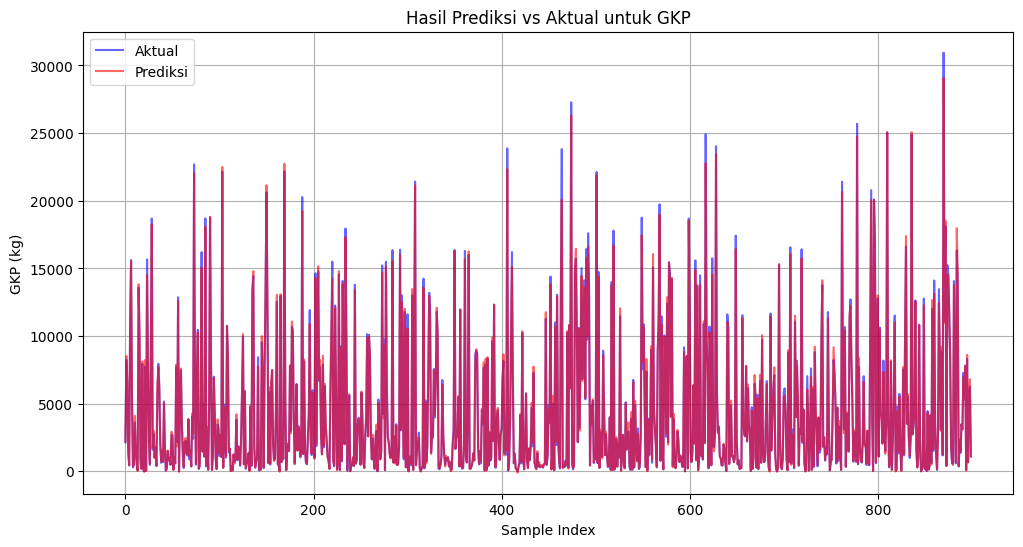

In [25]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Aktual", color="blue", alpha=0.6)
plt.plot(y_pred_gkp, label="Prediksi", color="red", alpha=0.6)
plt.title(f"Hasil Prediksi vs Aktual untuk GKP")
plt.xlabel("Sample Index")
plt.ylabel("GKP (kg)")
plt.legend()
plt.grid()
plt.show()

#Testing dengan data real-world

In [28]:
# Contoh data baru (real-world data)
new_data = pd.DataFrame({
    "Tahun": [2023],
    "Musim Tanam": ["Musim Tanam Gadu"],
    "Luas Lahan (m2)": [10000],
    "Curah Hujan": ["normal"],
    "Tingkat Penyakit": ["rendah"],
    "Suhu (C)": [28],
    "Jarak Tanam": ["25cm x 25cm"],
    "Jumlah Bibit (kg)": [16]
})

# Preprocessing data baru
# Map Musim Tanam
new_data["Musim Tanam"] = new_data["Musim Tanam"].map({
    "Musim Tanam Utama": 0,
    "Musim Tanam Gadu": 1,
    "Musim Tanam Kemarau": 2
})

# Konversi Curah Hujan ke numerik
rainfall_map = {'sangat rendah': 0, 'rendah': 1, 'normal': 2, 'tinggi': 3, 'sangat tinggi': 4}
new_data['Curah_Hujan_Num'] = new_data['Curah Hujan'].map(rainfall_map)

# Konversi Tingkat Penyakit ke numerik
pest_map = {'sangat rendah': 0, 'rendah': 1, 'normal': 2, 'tinggi': 3, 'sangat tinggi': 4}
new_data['Tingkat_Penyakit_Num'] = new_data['Tingkat Penyakit'].map(pest_map)

# Konversi kategori Jarak Tanam ke numerik
spacing_map = {'20cm x 20cm': 0, '25cm x 25cm': 1, '30cm x 30cm': 2}
new_data['Jarak_Tanam_Num'] = new_data['Jarak Tanam'].map(spacing_map)

# Konversi Jumlah Bibit dan Prediksi Hasil Panen menjadi integer jika diperlukan
new_data['Jumlah_Bibit_kg'] = new_data['Jumlah Bibit (kg)'].astype(int)

#jika ada kolom kosong maka akan digantikan dengan nilai 0
missing_cols = set(X_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0

# penyesuaian kolom data baru dengan kolom x_train
new_data = new_data[X_train.columns]

# Standarisasi data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi menggunakan model
new_predictions = model.predict(new_data_scaled)[0]

# Tampilkan hasil prediksi
print("\nPrediksi hasil panen untuk data baru:")
print(f"GKP: {new_predictions:.2f} kg")

# Hitung GKG dan Beras berdasarkan hubungan matematis
gkg_prediction = 0.7 * new_predictions
beras_prediction = 0.65 * gkg_prediction

print(f"GKG: {gkg_prediction:.2f} kg")
print(f"Beras: {beras_prediction:.2f} kg")



Prediksi hasil panen untuk data baru:
GKP: 4461.42 kg
GKG: 3123.00 kg
Beras: 2029.95 kg
